<b>Учебная группа:ЭФБО-07-22</b><br>
<b>ФИО: Енин Дмитрий Сергеевич</b><br>

---


<b>Практическое занятие №1.</b><br>


---

***Задание №1***<br>
Напишите программу, которая считывает два целых числа a и b и выводит наибольшее значение из них. Числа — целые от 1 до 1000.
При решении задачи можно пользоваться только целочисленными арифметическими операциями +, -, *, //, %, =. Нельзя пользоваться нелинейными конструкциями: ветвлениями, циклами, функциями вычисления модуля, извлечения квадратного корня.
Использование функции max запрещено!

In [1]:
def max_integer(a, b):
    diff = a - b

    k = (diff // 1000) % 2

    max_value = a - k * diff

    return max_value

a = int(input("Введите первое число (от 1 до 1000): "))
b = int(input("Введите второе число (от 1 до 1000): "))

print("Наибольшее значение:", max_integer(a, b))

Введите первое число (от 1 до 1000): 535
Введите второе число (от 1 до 1000): 235
Наибольшее значение: 535


***Задание №2***<br>
Определить можно ли с использованием только операций «прибавить 3» и «прибавить 5» получить из числа 1 число N  - натуральное, не превышает 200. Разумеется, само число 1 получить можно, просто не применяя никаких операций.

In [2]:
def can_obtain(N):
    if N < 1 or N > 200:
        return False

    # Массив для хранения информации о достижимости чисел
    reachable = [False] * (N + 1)
    reachable[1] = True  # Начальное условие

    for i in range(1, N + 1):
        if reachable[i]:
            if i + 3 <= N:
                reachable[i + 3] = True
            if i + 5 <= N:
                reachable[i + 5] = True

    return reachable[N]

# Пример использования
N = int(input("Введите число N (от 1 до 200): "))

if can_obtain(N):
    print(f"Число {N} можно получить из 1 с использованием только операций 'прибавить 3' и 'прибавить 5'.")
else:
    print(f"Число {N} нельзя получить из 1 с использованием только операций 'прибавить 3' и 'прибавить 5'.")

Введите число N (от 1 до 200): 6
Число 6 можно получить из 1 с использованием только операций 'прибавить 3' и 'прибавить 5'.


***Задание №3***<br>
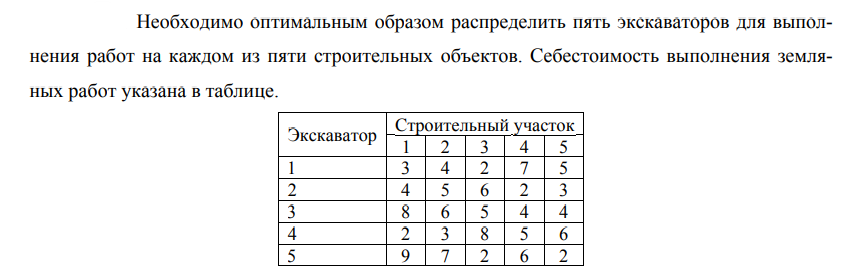

In [3]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Матрица стоимости выполнения земляных работ
cost_matrix = np.array([
    [3, 4, 2, 7, 5],
    [4, 5, 6, 2, 3],
    [8, 6, 5, 3, 4],
    [2, 3, 8, 5, 7],
    [9, 7, 7, 6, 2]
])

# Применение венгерского метода для нахождения оптимального распределения
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Вывод результатов
print("Оптимальное распределение экскаваторов по участкам:")
for i in range(len(row_ind)):
    print(f"Экскаватор {row_ind[i] + 1} -> Участок {col_ind[i] + 1}")

total_cost = cost_matrix[row_ind, col_ind].sum()
print(f"Минимальная суммарная стоимость: {total_cost}")

Оптимальное распределение экскаваторов по участкам:
Экскаватор 1 -> Участок 3
Экскаватор 2 -> Участок 4
Экскаватор 3 -> Участок 2
Экскаватор 4 -> Участок 1
Экскаватор 5 -> Участок 5
Минимальная суммарная стоимость: 14


***Задание №4***<br>
Пусть задан список, состоящий из N чисел (не более 100 чисел). Необходимо написать программу, которая составляет из них максимальное число (например,  [61, 228, 9] -> 961228)

In [5]:
from functools import cmp_to_key

def compare(x, y):
    # Сравниваем x + y и y + x как строки
    if x + y > y + x:
        return -1
    elif x + y < y + x:
        return 1
    else:
        return 0

def largest_number(nums):
    # Преобразуем числа в строки
    nums_str = list(map(str, nums))

    # Сортируем числа с использованием кастомного компаратора
    nums_str_sorted = sorted(nums_str, key=cmp_to_key(compare))

    # Соединяем отсортированные строки в одно число
    largest_num = ''.join(nums_str_sorted)

    # Убираем ведущие нули (если есть)
    return largest_num.lstrip('0') or '0'

# Пример использования
nums = [61, 228, 9]
print("Максимальное число:", largest_number(nums))

Максимальное число: 961228


***Задание №5***<br>
У вас есть девять цифр: 1, 2, …, 9. Именно в таком порядке. Вы можете вставлять между ними знаки «+», «-» или ничего. У вас будут получаться выражения вида 123+45-6+7+89. Найдите все из них, которые равны 100.

In [6]:
def find_expressions(target, digits, expr="", index=0, current_value=0, last_value=0):
    if index == len(digits):
        if current_value == target:
            print(expr)
        return

    for i in range(index, len(digits)):
        num_str = digits[index:i+1]
        num = int(num_str)

        if index == 0:
            # Начало выражения
            find_expressions(target, digits, num_str, i+1, num, num)
        else:
            # Добавляем знак "+"
            find_expressions(target, digits, expr + "+" + num_str, i+1, current_value + num, num)
            # Добавляем знак "-"
            find_expressions(target, digits, expr + "-" + num_str, i+1, current_value - num, -num)

def main():
    digits = "123456789"
    target = 100
    find_expressions(target, digits)

if __name__ == "__main__":
    main()

1+2+3-4+5+6+78+9
1+2+34-5+67-8+9
1+23-4+5+6+78-9
1+23-4+56+7+8+9
12+3+4+5-6-7+89
12+3-4+5+67+8+9
12-3-4+5-6+7+89
123+4-5+67-89
123-4-5-6-7+8-9
123+45-67+8-9
123-45-67+89
